# Likelihood-ratio test
Playing around, like Bayes factor https://en.wikipedia.org/wiki/Likelihood-ratio_test

Compare normal vs beta for beat distributed data

In [4]:
import numpy as np
import scipy
import seaborn as sns
import pymc3 as pm
import matplotlib.pyplot as plt

sns.set(font_scale=1.5)

In [6]:
data_dist = scipy.stats.beta(2, 5)

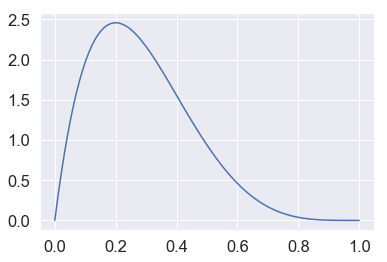

In [7]:
XX = np.linspace(0, 1, 100)
plt.plot(XX, data_dist.pdf(XX))

In [8]:
data = data_dist.rvs(size=100)

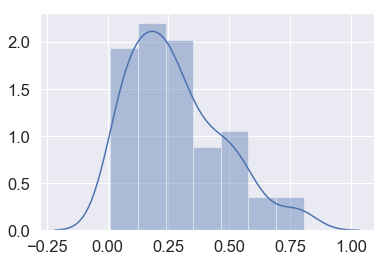

In [9]:
sns.distplot(data)

In [17]:
with pm.Model() as model:
    n_mu = pm.Uniform('n_mu', 0, 100)
    n_sd = pm.Uniform('n_sd', 0, 100)
    normal = pm.Normal('normal', n_mu, sd=n_sd, observed=data)
    
    b_alpha = pm.Uniform('b_alpha', 0, 100)
    b_beta = pm.Uniform('b_beta', 0, 100)
    beta = pm.Beta('beta', b_alpha, b_beta, observed=data)

    trace = pm.sample(10000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [b_beta, b_alpha, n_sd, n_mu]
Sampling 4 chains: 100%|██████████| 42000/42000 [00:19<00:00, 2182.09draws/s]


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x124d1c3c8>,
      dtype=object)

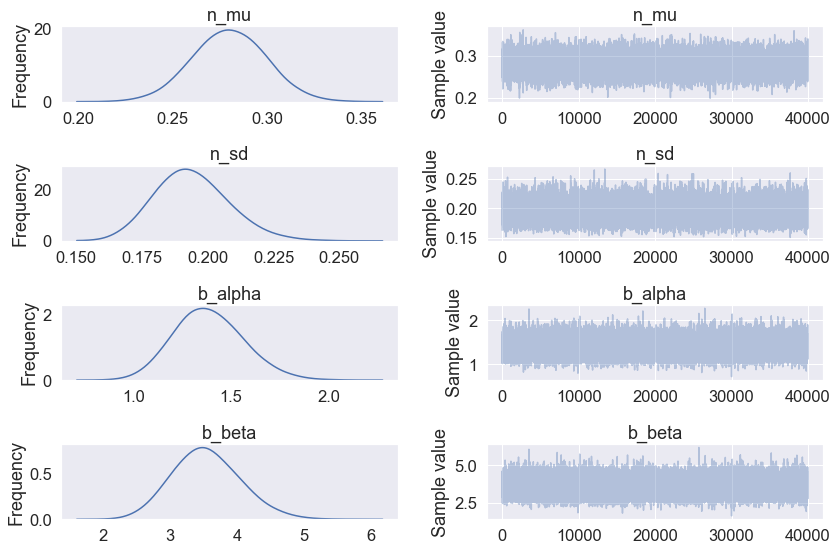

In [18]:
pm.traceplot(trace, combined=True)

In [19]:
ppc = pm.sample_posterior_predictive(trace, samples=5000, model=model)

100%|██████████| 5000/5000 [00:04<00:00, 1031.56it/s]


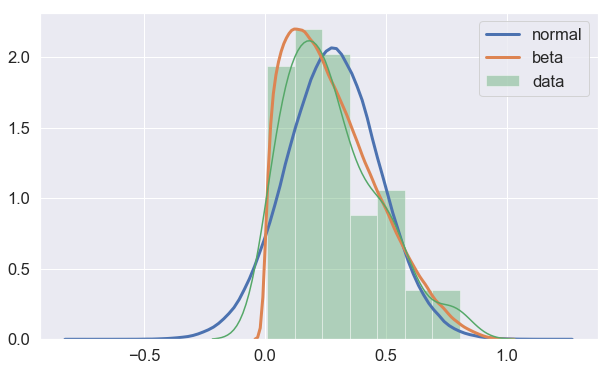

In [35]:
plt.figure(figsize=(10,6))
sns.kdeplot(ppc['normal'].flatten(), label='normal', lw=3)
sns.kdeplot(ppc['beta'].flatten(), label='beta', lw=3)
sns.distplot(data, label='data')
plt.legend()